# Students Performance in Exams

### Context
This data set includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them.

### Inspiration behind this project:
To understand the influence of the parents background, test preparation etc on students performance.

## Summary
The main aim of this notebook is to analyse how are the scores impacted based on different variables which include gender, race, lunch, test preparation course etc...


Each column is picked and analysed how they affect the scores. 

For easy understanding we'll be using graphs and plots because visualisation is the best way to understand.

In [3]:
# hiding unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [5]:
# importing dataset into jupyter notebook
student_df = pd.read_csv('StudentsPerformance.csv')

In [6]:
# viewing the first 5 rows of the student performance dataset
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# getting information about the dataset
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# getting the shape of the dataframe
student_df.shape

(1000, 8)

The datasetcontains 1000 entries with 9 columns.

In [9]:
# understanding basic information of the data like min, max, mean and standard deviation etc.
student_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
# checking for missing values
student_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [20]:
#Number of race/ethnicity in dataset
race = student_df['race/ethnicity'].nunique()
print(f'There are {race} ethnicity present in the dataset.')

There are 5 ethnicity present in the dataset.


In [22]:
#Number of students in each race/ethnicity
student_df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [21]:
#Number of students that completed their test according to their ehnicity.
student_df.groupby('race/ethnicity')['test preparation course'].value_counts()

race/ethnicity  test preparation course
group A         none                        58
                completed                   31
group B         none                       122
                completed                   68
group C         none                       202
                completed                  117
group D         none                       180
                completed                   82
group E         none                        80
                completed                   60
Name: test preparation course, dtype: int64

In [24]:
# Printing the average scores
print(f"Average math score is    : {student_df['math score'].mean()}")
print(f"Average reading score is : {student_df['reading score'].mean()}")
print(f"Average writing score is : {student_df['writing score'].mean()}")
#print(f"Average total score is   : {round((student_df['total score'].mean())/3, 3)}")

Average math score is    : 66.089
Average reading score is : 69.169
Average writing score is : 68.054


In [27]:
#Calculating the average score of each ethnic group
student_df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


From the table above, we can deduce the following;
 
- Students in group E have the highest scores across all subjects
 
- Students in group A have the least scores across all subjects

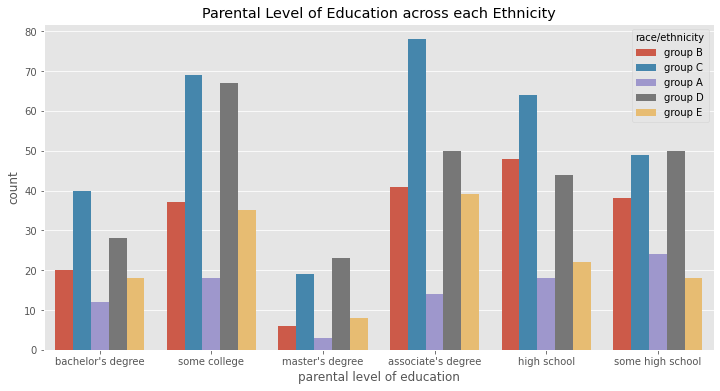

In [12]:
#Plotting graph
plt.figure(figsize=(12,6))
plt.title('Parental Level of Education across each Ethnicity')
sns.countplot(x="parental level of education", data = student_df, hue='race/ethnicity');

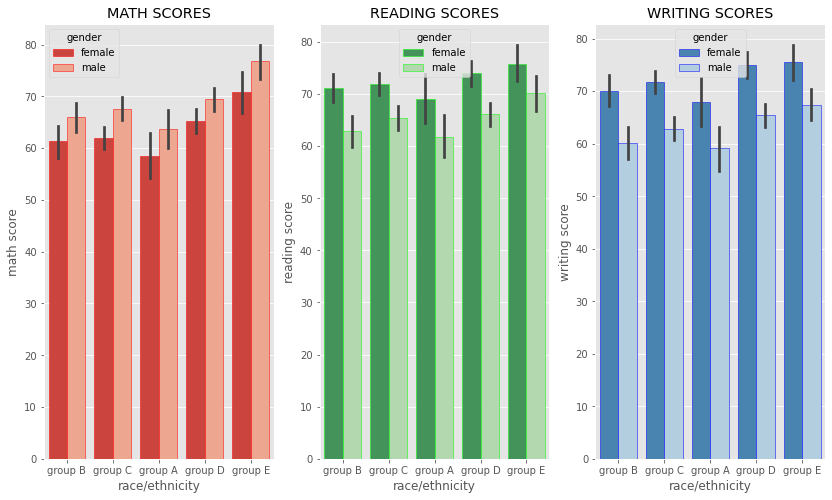

In [13]:
# Checking indepthly how people score from different ethnicity.
plt.figure(figsize=(14,8))

plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity',y='math score',
            data=student_df, hue='gender',palette='Reds_r',edgecolor='#ff0000')

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',
            data=student_df, hue='gender',palette='Greens_r',edgecolor='#00ff00')

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',
            data=student_df, hue='gender',palette='Blues_r',edgecolor='#0000ff')
plt.show()

It is observed that male students are better at maths across all ethnicity/race while the female students are better readers and writers across all ethnicity/race.

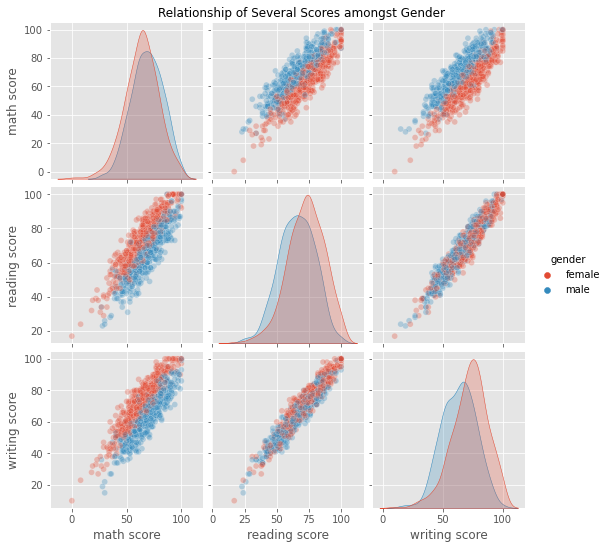

In [14]:
# visualizing the overall relationship of male and female across several features
sns.pairplot(data=student_df,
             hue='gender',
             plot_kws={'alpha':0.3}
            ).fig.suptitle('Relationship of Several Scores amongst Gender', 
                           y=1.01)
plt.show()

From the above plot it is clear that all the scores increase linearly with each other thus showing a strong positive correlation.

In [15]:
# checking the correlation of the various scores
student_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


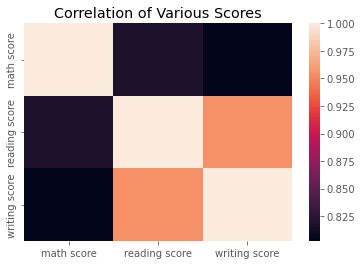

In [16]:
plt.title('Correlation of Various Scores')

sns.heatmap(student_df.corr());

From the graph above, we can tell that Writing scores and Math scores have the least correlation.

Reading scores has a high correlation with Writing scores 

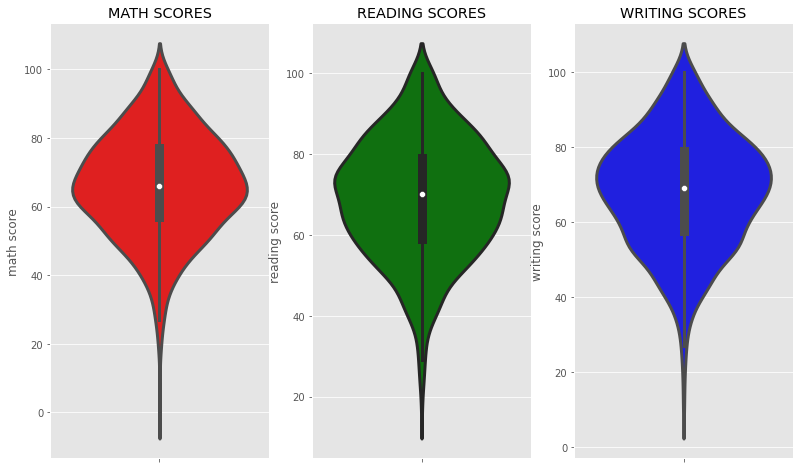

In [17]:
#Violin Plots
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=student_df,color='red',linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=student_df,color='green',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=student_df,color='blue',linewidth=3)

plt.show()

From the above plots, it's clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

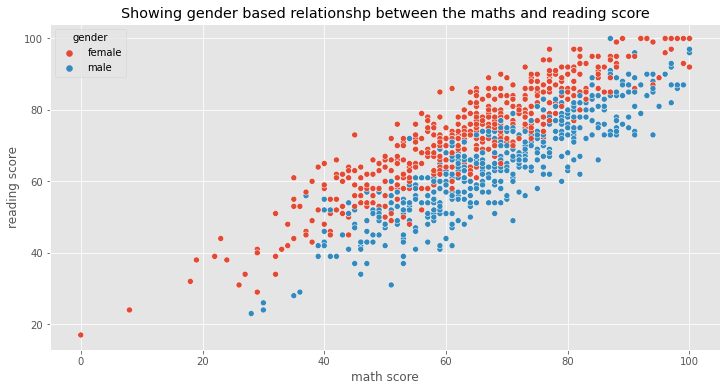

In [18]:
# Showing gender based relationshp between the maths and reading score
plt.figure(figsize=(12, 6))
plt.title('Showing gender based relationshp between the maths and reading score')
sns.scatterplot(x='math score', y='reading score', hue ='gender', data=student_df);

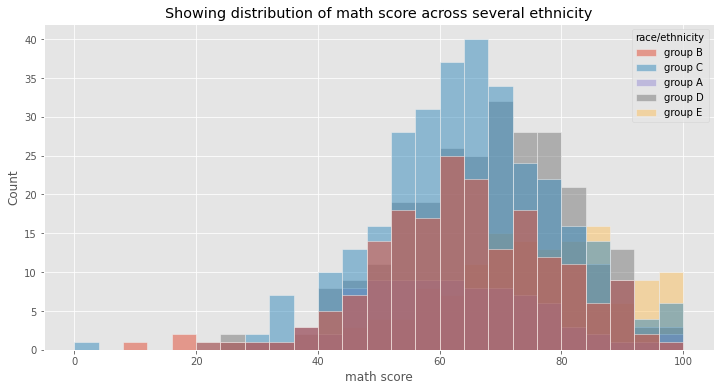

In [19]:
# distribution of math score
plt.figure(figsize=(12, 6))
plt.title('Showing distribution of math score across several ethnicity')
sns.histplot(x='math score', hue='race/ethnicity' ,data=student_df);

It is observed from the graph above that;

- Group C has the highest number of students that scored between 50 and 75

- Group E ethnicity has the highest number of students that score high in mathematics

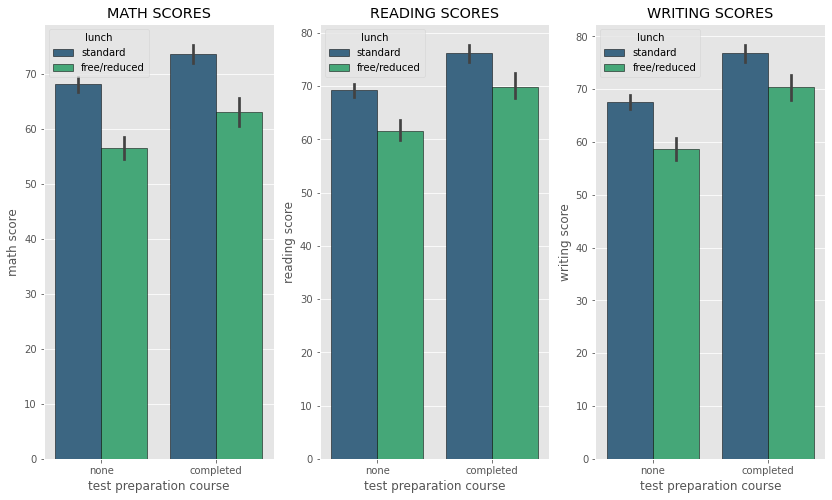

In [28]:
# checking how lunch affects the scores
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)

sns.barplot(x='test preparation course',y='math score',
            data=student_df, hue='lunch',palette='viridis',edgecolor='black')
plt.title('MATH SCORES')

plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',
            data=student_df, hue='lunch',palette='viridis',edgecolor='black')
plt.title('READING SCORES')

plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',
            data=student_df, hue='lunch',palette='viridis',edgecolor='black',)
plt.title('WRITING SCORES')

plt.show()

This graph shows that students that were given the standard lunch always score higher in maths, reading and writing compared to students that received the free/reduced lunch.

In [34]:
# creating a new column that aggreagtes the total score
student_df['total score'] = (
    student_df['math score'] + student_df['reading score'] + student_df['writing score']
)
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


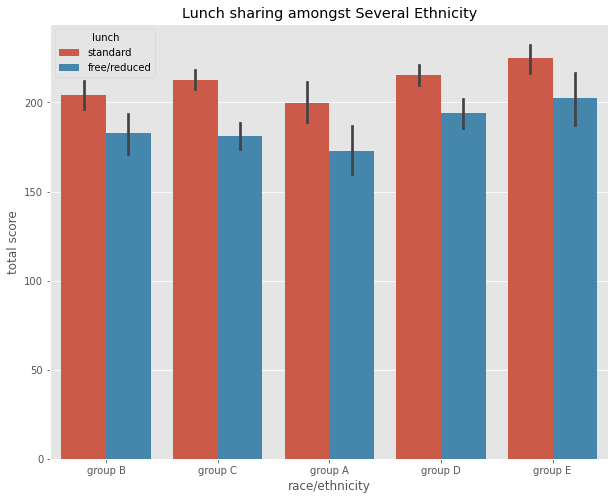

In [33]:
#visualizing the lunch sharing across several ethnicity
plt.figure(figsize=(10,8))
plt.title('Lunch sharing amongst Several Ethnicity')
sns.barplot(x='race/ethnicity', data=student_df, hue='lunch', y='total score')
plt.show()

#### Observations:

- Across all race, the students getting the standard lunch averagely perform better than the students with free/ reduced lunch.


- Students from the group E race perform better compared to the other races.



- Group E has the highest number of students with a higher cummulative score.

# Machine Learning

In [35]:
# importing the required machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [36]:
#Making a copy of the original dataset 
train_df = student_df.copy()

In [37]:
# spilitng our dataset into feature and target
X = train_df.drop(['math score', 'total score'], axis=1) #feature
y = train_df['math score'] #target

In [38]:
# filtering the numeric and categorical variables 
cat_col = X.select_dtypes(include = ['object']).columns.tolist()
num_col = X.select_dtypes(include = ['int64']).columns.tolist()

In [39]:
# converting the categorical variables to 0s and 1s so the machine can understand
X_cat = pd.get_dummies(X[cat_col])
X_cat.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [40]:
# filtering out only the numerical colum from the dataset
X_num = X[num_col]
X_num.head()

,reading score,writing score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75


In [41]:
# Create the scaler instance
scaler = MinMaxScaler()

In [42]:
# Fit the scaler to the numeric columns
model = scaler.fit(X_num)

In [43]:
# Transform and replace the numeric columns
X_scaled = model.transform(X_num)
display(X_scaled)
type(X_scaled)

array([[0.6626506 , 0.71111111],
       [0.87951807, 0.86666667],
       [0.93975904, 0.92222222],
       ...,
       [0.65060241, 0.61111111],
       [0.73493976, 0.74444444],
       [0.8313253 , 0.84444444]])

numpy.ndarray

In [44]:
num_df = pd.DataFrame(X_scaled, columns=['reading score', 'writing score'])
num_df.head()

,reading score,writing score
0,0.662651,0.711111
1,0.879518,0.866667
2,0.939759,0.922222
3,0.481928,0.377778
4,0.734940,0.722222


In [45]:
# joining the numerical and categorical dataframe to a new dataframe for machine learning
X_new = pd.concat([X_cat, num_df], axis=1)
X_new.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,reading score,writing score
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0.662651,0.711111
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0.879518,0.866667
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0.939759,0.922222
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0.481928,0.377778
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0.734940,0.722222


In [46]:
# spliting the test and train data into a 75% train size and 25% test size
X_train, y_train, X_test, y_test = train_test_split(X_new, y, test_size=0.25, random_state=42)

In [47]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((750, 19), (250, 19), (750,), (250,))

In [48]:
model = LinearRegression()
model.fit(X_train, X_test)

LinearRegression()

In [49]:
X_preds = model.predict(X_train)

In [50]:
# Calculation of Mean Squared Error (MSE)
train_rmse = mean_squared_error(X_test, X_preds, squared=False)
print('The RMSE loss for the training set is {}.'.format(train_rmse))

The RMSE loss for the training set is 5.29744349210856.


In [51]:
y_preds = model.predict(y_train)

In [52]:
# Calculation of Mean Squared Error (MSE)
test_rmse = mean_squared_error(y_test,y_preds, squared=False)
print('The RMSE loss for the testing set is {}.'.format(test_rmse))

The RMSE loss for the testing set is 5.4842524247342155.


In [53]:
#Loooking at the weights assigned to different columns to figure out which columns in the dataset are the most important.
weights = model.coef_
weights

array([-4.68961199e+13, -4.68961199e+13,  2.55784862e+13,  2.55784862e+13,
        2.55784862e+13,  2.55784862e+13,  2.55784862e+13, -2.81717103e+13,
       -2.81717103e+13, -2.81717103e+13, -2.81717103e+13, -2.81717103e+13,
       -2.81717103e+13, -1.14261356e+12, -1.14261356e+12, -9.69388647e+12,
       -9.69388647e+12,  1.89991922e+01,  6.60065940e+01])

In [56]:
# creating a dataframe to view the weight assigned to each column.
weights_df = pd.DataFrame({
    'columns': X_train.columns,
    'weight': weights
}).sort_values('weight', ascending=False)
#To display the first 20 componets of the weight dataset.
weights_df.head(20)

,columns,weight
6,race/ethnicity_group E,2.557849e+13
2,race/ethnicity_group A,2.557849e+13
3,race/ethnicity_group B,2.557849e+13
4,race/ethnicity_group C,2.557849e+13
5,race/ethnicity_group D,2.557849e+13
18,writing score,6.600659e+01
17,reading score,1.899919e+01
14,lunch_standard,-1.142614e+12
13,lunch_free/reduced,-1.142614e+12
16,test preparation course_none,-9.693886e+12


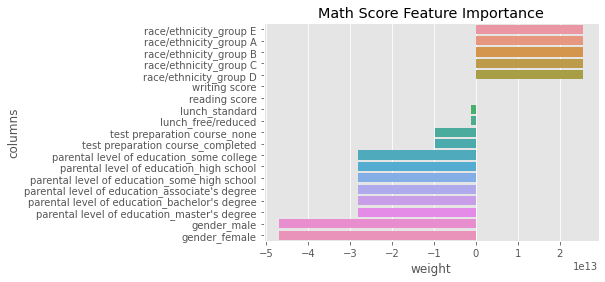

In [57]:
#Graphical illustration of our findings.
plt.title('Math Score Feature Importance')
sns.barplot(y=weights_df.head(20)['columns'], x=weights_df.head(20)['weight']);